https://www.ecad.eu/
www.ncei.noaa.gov/cag
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects


In [1]:
import os

import pandas as pd
import numpy as np

In [12]:
# get current working directory
os.getcwd()

'J:\\My Drive\\ITS_ML\\Materiali\\ML_PD-Appunti e Notebook\\ML_PD-02-IntroduzioneAllaDataScience'

In [15]:
os.listdir()

['ML_PD-ds01-Visualization.ipynb',
 '.ipynb_checkpoints',
 'diagramma.py',
 'ML_PD-ds03-Numpy.ipynb',
 'ML_PD-ds02-DinamicVisualization.ipynb',
 'diagramma_Dinamico.py',
 'ML_PD-ds05-NumpyEserciziSvolti.ipynb',
 'ML_PD-ds06-Pandas.ipynb',
 'data.txt',
 'ML_PD-ds04-NumpyEsercizi.ipynb',
 'ML_PD-ds07-Matplotlib.my.ipynb',
 'ML_PD-ds07-Matplotlib_.ipynb',
 'RAL_developers.png',
 'ML_PD-ds07-Matplotlib_scatter.txt',
 'ML_PD-ds08-DateTimeSeries.ipynb',
 'Assets']

In [53]:
pth_file = os.getcwd() + "\\Assets\\PrecipitazioniPadova\\" + "RR_SOUID115588.txt"

with open(pth_file) as f:
    riga = f.readline()
    while riga != ' STAID, SOUID,    DATE,   RR, Q_RR\n':
        riga = f.readline()
        
        
    
    my_csv = [riga.strip().split(",")]
    riga = f.readline()
    
    while riga != "":
        my_csv.append(riga.strip().split(","))
        riga = f.readline()

my_csv[:10]

[['STAID', ' SOUID', '    DATE', '   RR', ' Q_RR'],
 ['380', '115588', '19910101', '-9999', '    9'],
 ['380', '115588', '19910102', '-9999', '    9'],
 ['380', '115588', '19910103', '-9999', '    9'],
 ['380', '115588', '19910104', '-9999', '    9'],
 ['380', '115588', '19910105', '-9999', '    9'],
 ['380', '115588', '19910106', '-9999', '    9'],
 ['380', '115588', '19910107', '-9999', '    9'],
 ['380', '115588', '19910108', '-9999', '    9'],
 ['380', '115588', '19910109', '-9999', '    9']]

In [54]:
my_csv[0] = [j.strip() for j in my_csv[0]]
my_csv[:2]

[['STAID', 'SOUID', 'DATE', 'RR', 'Q_RR'],
 ['380', '115588', '19910101', '-9999', '    9'],
 ['380', '115588', '19910102', '-9999', '    9'],
 ['380', '115588', '19910103', '-9999', '    9'],
 ['380', '115588', '19910104', '-9999', '    9'],
 ['380', '115588', '19910105', '-9999', '    9'],
 ['380', '115588', '19910106', '-9999', '    9'],
 ['380', '115588', '19910107', '-9999', '    9'],
 ['380', '115588', '19910108', '-9999', '    9'],
 ['380', '115588', '19910109', '-9999', '    9']]

In [56]:
df = pd.DataFrame(my_csv[1:], columns = my_csv[0])

In [58]:
df.shape

(11382, 5)

In [61]:
df.dtypes

STAID    object
SOUID    object
DATE     object
RR       object
Q_RR     object
dtype: object

In [64]:
pd.to_datetime(df.DATE)

0       1991-01-01
1       1991-01-02
2       1991-01-03
3       1991-01-04
4       1991-01-05
           ...    
11377   2022-02-24
11378   2022-02-25
11379   2022-02-26
11380   2022-02-27
11381   2022-02-28
Name: DATE, Length: 11382, dtype: datetime64[ns]

In [66]:
pd.to_numeric(df.STAID)

0        380
1        380
2        380
3        380
4        380
        ... 
11377    380
11378    380
11379    380
11380    380
11381    380
Name: STAID, Length: 11382, dtype: int64

In [68]:
df = df.astype(int)

In [69]:
df.dtypes

STAID    int32
SOUID    int32
DATE     int32
RR       int32
Q_RR     int32
dtype: object

In [86]:
df.DATE = pd.to_datetime(df.DATE, format = "%Y%m%d")

In [90]:
df = df.set_index("DATE")

In [95]:
df_filtrato = df[df.RR != -9999]

In [104]:
df_filtrato_mese = df_filtrato.resample('M').agg({'STAID':'mean', 'SOUID':'mean', 'RR':'sum', 'Q_RR':'mean'})

<AxesSubplot:xlabel='DATE'>

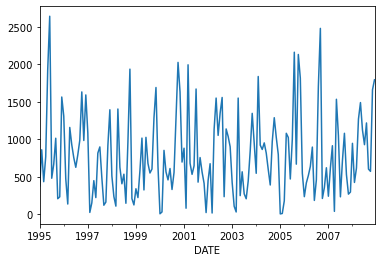

In [109]:
df_filtrato_mese.RR.plot()